<a href="https://colab.research.google.com/github/karler/ComputationalPerception/blob/main/Proyecto_Final_1_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parte inicial, importando las librerias necesarias

In [1]:
import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt

Descarga una imagen desde una URL dada y la convierte en un formato que OpenCV puede procesar.
He utilizado la biblioteca "requests" para acceder a la url y luego convertir la imagen a un array de Numpy para que OpenCV lo pueda leer correctamente

In [2]:
def descargar_imagen(url):
    respuesta = requests.get(url)
    respuesta.raise_for_status()
    array_imagen = np.asarray(bytearray(respuesta.content), dtype="uint8")
    return cv2.imdecode(array_imagen, cv2.IMREAD_COLOR)

Agrega ruido de sal y pimienta a una imagen dada.
El ruido son puntitos de pixeles blancos y negros dispuestos aletoriamente.

La cantidad es la proporción de pixeles que se convertirán en ruido, esta con 5% (0.05)

In [3]:
def agregar_ruido_sal_y_pimienta(imagen, cantidad=0.05):
    imagen_ruidosa = imagen.copy()
    # Añade puntitos blancos (sal)
    num_sal = int(cantidad * imagen.size * 0.5)
    coordenadas = [np.random.randint(0, i - 1, num_sal) for i in imagen.shape]
    imagen_ruidosa[tuple(coordenadas)] = 1

    # Añade puntitos negros (pimienta)
    num_pimienta = int(cantidad * imagen.size * 0.5)
    coordenadas = [np.random.randint(0, i - 1, num_pimienta) for i in imagen.shape]
    imagen_ruidosa[tuple(coordenadas)] = 0
    return imagen_ruidosa

Aqui solo le doy a una lista las url de las imagenes que voy utilizar

In [7]:
urls_imagenes = [
    "http://bv.lasalleurubamba.edu.pe/foto01.jpg",
    "http://bv.lasalleurubamba.edu.pe/foto02.jpg"
]

Este bucle es la parte principal de este proyecto. Para cada imagen:
 1. La descargamos
 2. Le añadimos ruido
 3. Eliminamos el ruido con el filtro mediano, este filtro funciona reemplazando cada pixel con la mediana de los pixeles que estan proximos a el. En este código esta congigurado con 5 que significa que tomará los datos de 5x5 pixeles.
 4. Mostramos la imagen ya limpia de ruido

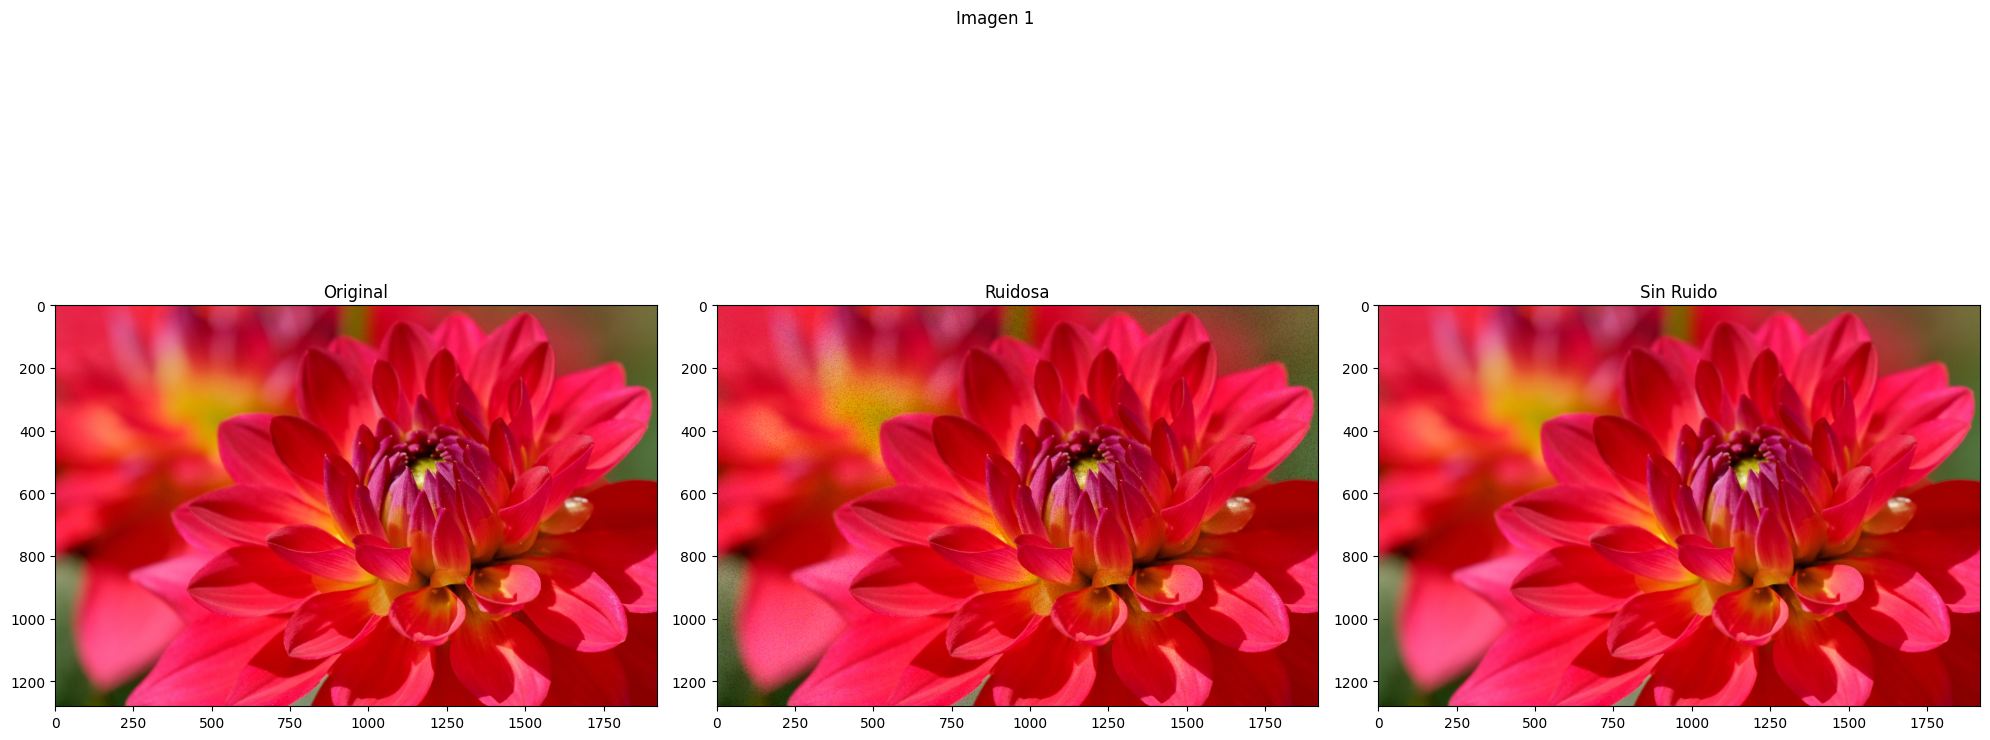

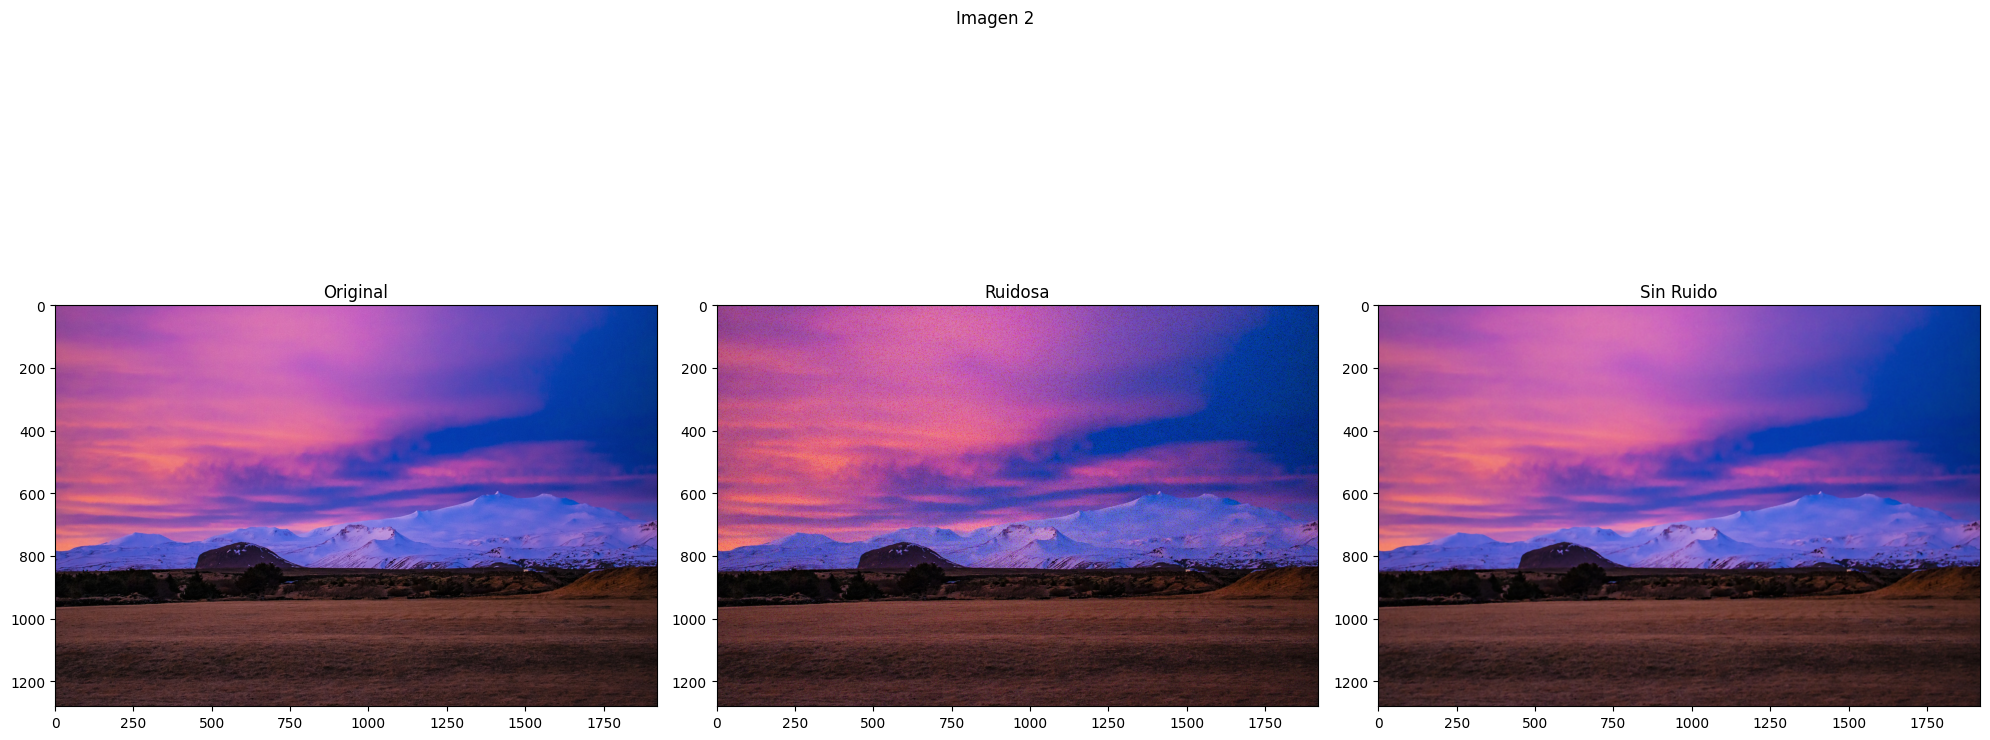

In [8]:
for i, url in enumerate(urls_imagenes):
    # Descargamos la imagen que tengo en la URL
    imagen_original = descargar_imagen(url)

    # Crea una nueva figura para cada imagen
    # Esto asegura que cada imagen tenga su propio conjunto de subplots
    plt.figure(figsize=(20,10))
    plt.suptitle(f'Imagen {i+1}')

    # Muestra la imagen original
    plt.subplot(131), plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB)), plt.title('Original')

    # Agrega el ruido y muestra la imagen ruidosa
    imagen_ruidosa = agregar_ruido_sal_y_pimienta(imagen_original)
    plt.subplot(132), plt.imshow(cv2.cvtColor(imagen_ruidosa, cv2.COLOR_BGR2RGB)), plt.title('Ruidosa')

    # Elimina el ruido usando un filtro mediano y muestra el resultado
    imagen_sin_ruido = cv2.medianBlur(imagen_ruidosa, 5)
    plt.subplot(133), plt.imshow(cv2.cvtColor(imagen_sin_ruido, cv2.COLOR_BGR2RGB)), plt.title('Sin Ruido')

    # Ajusta el diseño y muestra la imagen ya procesada y limpia
    plt.tight_layout()
    plt.show()